# Titanic

## Introduction
In this exercise we tried to explore the titanic dataset. First we need to load the data using pandas then process the data to data frame. Later we need to data cleaning and data analysis using pandas and create visualization using matplotlib.

1. Import the Required Libraries

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

This for import to open csv file using pandas and matplotlib for creating static, animated, and interactive visualizations in Python.

2. Load the Dataset

Load the Titanic dataset from a CSV file named 'titanic.csv' into a Pandas DataFrame.

In [52]:
df = pd.read_csv('titanic.csv')

This process to convert the data to data frame.

3. Data Exploration

In this step we want to know the data structure.

In [53]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


To print the first 5 rows of the data frame to understand the structure.

In [54]:
df.shape

(891, 12)

Print information about the how many columns and rows.

In [55]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

To know their data types

In [56]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

To see summary statistics for numerical columns (e.g., mean, min, max, etc.).

4. Data Cleaning

In [57]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Identify missing values in the dataset

In [58]:
df1 = df.copy()
df1["Age"] = df1["Age"].mean()
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

df1 used to keep the original dataframe from any changes.

To add missing value with median in age column.

In [59]:
df1 = df1.dropna()

To drop missing value in cabin and embarked column.

5. Data Analysis

To see the analyse the data from the dataframe.

In [60]:
df1['Sex'].value_counts()

Sex
male      107
female     95
Name: count, dtype: int64

This step used to count the the amount of the gender (male / female) in the data set.

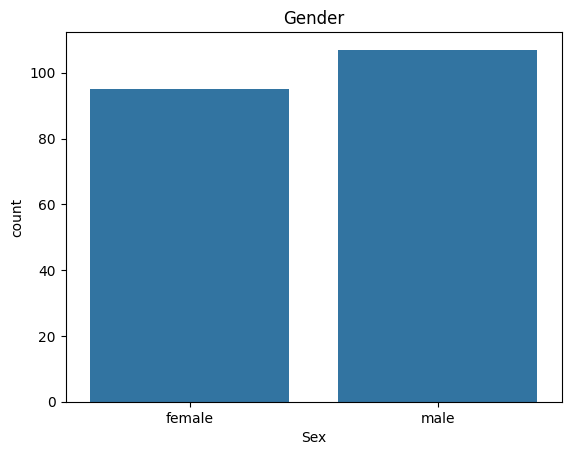

In [61]:
import seaborn as sns
sns.countplot(x='Sex', data=df1,)
plt.title('Gender')
plt.show()

Calculate and display the count of passengers by gender and visualize the data in bar graph.

In [62]:
df1['Age'].mean()

29.699117647058813

Compute the average age of passengers.

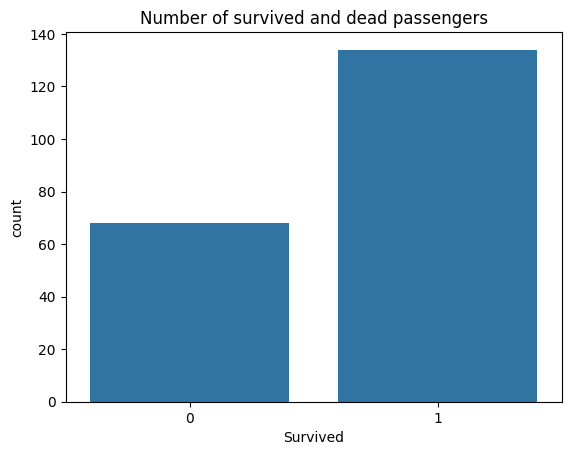

In [63]:
sns.countplot(x='Survived', data=df1,)
label=["Dead", "Survived"]
plt.title('Number of survived and dead passengers')
plt.show()

To see amount of people survived.

6. Correlation between survival and ticket class

To see their economic class boarded to the Titanic.

In [64]:
fares_df=df1[["Fare", "Survived"]]
fares=df1["Fare"]

Process on calculating the amount people boarded according to the ticket class and the ratio.

In [66]:
survival_rate_by_class = df1.groupby('Pclass')['Survived'].mean() * 100

print(survival_rate_by_class)

Pclass
1    66.091954
2    81.250000
3    50.000000
Name: Survived, dtype: float64


To see the survival rates based on the ticket class.

In summary the ticket class has indeed an impact on the chances of survival. Passengers with higher ticket class did have a higher chances to survive.

6. Data Visualization


Create a bar chart to visualize the survival rate by passenger class.

In [67]:
su = df1.groupby(["Survived","Pclass"])

# Count the passengers from each class who not have survived
dead_class_1 = g.get_group((0,1))["PassengerId"].count()
dead_class_2 = g.get_group((0,2))["PassengerId"].count()
dead_class_3 = g.get_group((0,3))["PassengerId"].count()

# Count the passengers from each class who  have survived
survived_class_1 = g.get_group((1,1))["PassengerId"].count()
survived_class_2 = g.get_group((1,2))["PassengerId"].count()
survived_class_3 = g.get_group((1,3))["PassengerId"].count()

# Get the Groupby object
g=df1.groupby(["Pclass"])
# Count the passengers in each class
passengers_class1=float(g.get_group((1))["PassengerId"].count())
passengers_class2=float(g.get_group((2))["PassengerId"].count())
passengers_class3=float(g.get_group((3))["PassengerId"].count())

C:\Users\Kevin\AppData\Local\Temp\ipykernel_23248\46480347.py:16: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  passengers_class1=float(g.get_group((1))["PassengerId"].count())
C:\Users\Kevin\AppData\Local\Temp\ipykernel_23248\46480347.py:17: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  passengers_class2=float(g.get_group((2))["PassengerId"].count())
C:\Users\Kevin\AppData\Local\Temp\ipykernel_23248\46480347.py:18: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  passengers_class3=float(g.get_group((3))["PassengerId"].count())


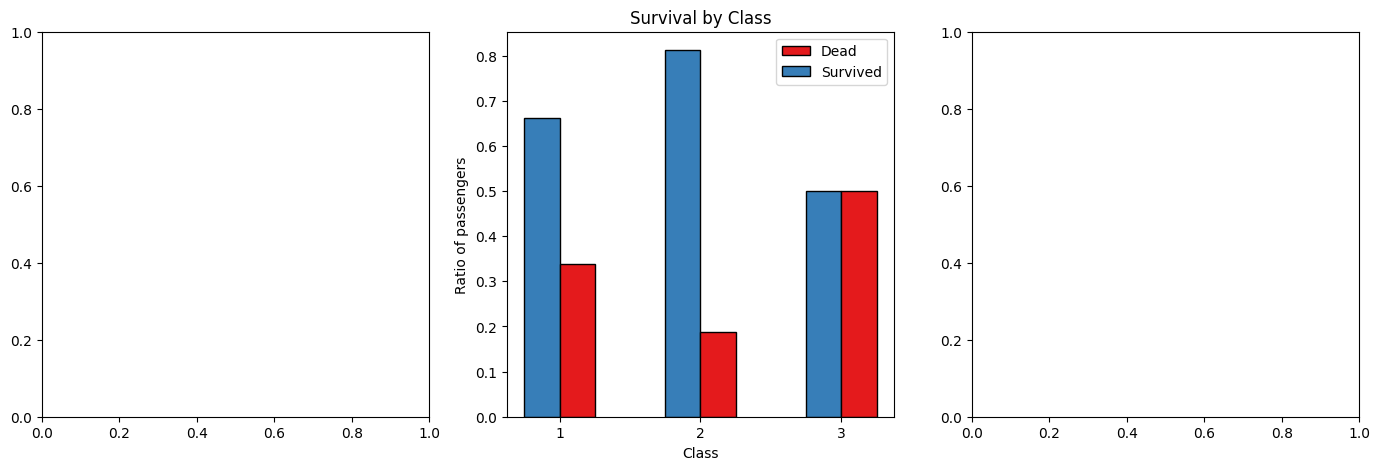

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 5)) 
y1, y2, y3=dead_class_1/passengers_class1, dead_class_2/passengers_class2, dead_class_3/passengers_class3
z1, z2, z3=survived_class_1/passengers_class1, survived_class_2/passengers_class2, survived_class_3/passengers_class3
dead=[y1, y2, y3]
survived=[z1, z2, z3]
width=0.25
ind = np.arange(3) 
bar1 = axes[1].bar(ind, survived, width,color='#377eb8', edgecolor = "Black")
bar2 = axes[1].bar(ind+width, dead, width,color='#e41a1c', edgecolor = "Black")
axes[1].legend((bar2, bar1), ('Dead', 'Survived'))
axes[1].set_title("Survival by Class")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Ratio of passengers")
axes[1].set_xticks(ind+width/2)
axes[1].set_xticklabels(["1", "2", "3"])
plt.show()

Add appropriate labels and a title to the chart.

7. Conclusion

